# seqsyn

1. Convert a 1 dimensional sequence into $ n $ dimensional sequence.
2. Rotate row until first element of row equals with last element from last row
3. Continue until rotating is not able to sync
4. Visualize amount of rotations per row
5. Try different settings:
    - dimension size
    - rotation direction
    - switch direction after each
    
$ \pi $ squence used for example

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from tqdm.notebook import tqdm

### Implementing functions

In [2]:
def get_primes(n):
    primes = [2]
    for i in range(3, n):
        is_prime = True
        for j in range(2, int(i/2)+1):
            if i%j == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(i)
    return primes


def matrix(l, n):
    return [[l[i+j] for j in range(n)] for i in range(0, len(l)-n+1, n)]


def rotate(l, direction):
    direction = -direction
    return l[direction:] + l[:direction]


def syn(l, direction=1, switch=False):
    new_l = [l[0]]
    rotss = [0]
    for i in range(1, len(l)):
        s = l[i]
        
        rots = 0
        progress = False
        for _ in range(len(s)):
            if new_l[-1][-1] == s[0]:
                progress = True
                new_l.append(s)
                rotss.append(rots)
                if switch:
                    direction = -direction
                break
            else:
                s = rotate(s, direction)
                rots += 1
        if not progress:
            break
    return new_l, rotss

### Using grid search to find best parameters

In [3]:
N = 1000000
MATRIX = 100
DIRECTION = [1, -1]
SWITCH = [True, False]

with open("pi1000000.txt") as f:
    pi = f.read()[2:-1]


pi = pi[:N]
pi = [int(c) for c in pi]
results = [] 
for m in tqdm(range(2, MATRIX+1)):
    for d in DIRECTION:
        for s in SWITCH:
            temp_pi = matrix(pi, m)
            pi_syn, rotations = syn(temp_pi, direction=d, switch=s)
            results.append({
                "len": len(pi_syn)*m,
                "matrix": m,
                "direction": d,
                "switch": s
            })

df = pd.DataFrame(results)
df.sort_values("len", ascending=False).head(20)

,len,matrix,direction,switch
395,1000000,100,-1,False
394,1000000,100,-1,True
393,1000000,100,1,False
392,1000000,100,1,True
391,999999,99,-1,False
390,999999,99,-1,True
357,999999,91,1,False
358,999999,91,-1,True
386,999992,98,-1,True
385,999992,98,1,False


### Visualize correlation between matrix size and distance reached in sequence

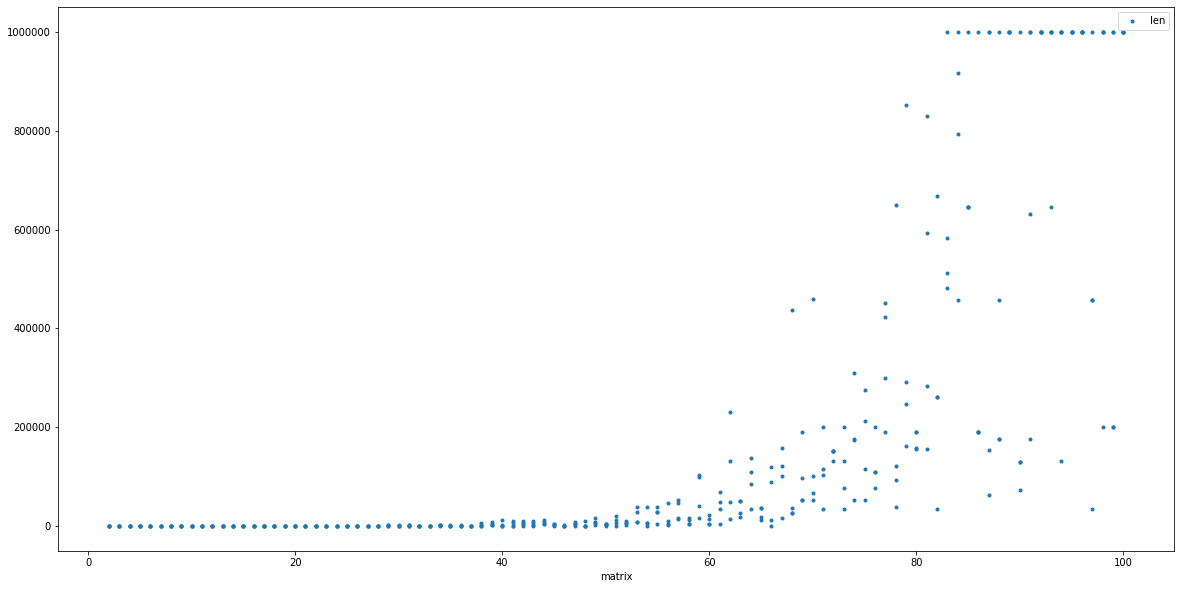

In [4]:
df.sort_values("len", ascending=False).plot(x="matrix", y="len", style=".", figsize=(20, 10))

In [8]:
df.loc[df["matrix"] < 65].sort_values("len", ascending=False)

,len,matrix,direction,switch
242,231322,62,-1,True
251,138304,64,-1,False
241,131316,62,1,False
249,108992,64,1,False
230,103132,59,-1,True
...,...,...,...,...
4,3,3,1,True
1,2,2,1,False
3,2,2,-1,False
2,2,2,-1,True


### Visualize example run roations (red if prime)

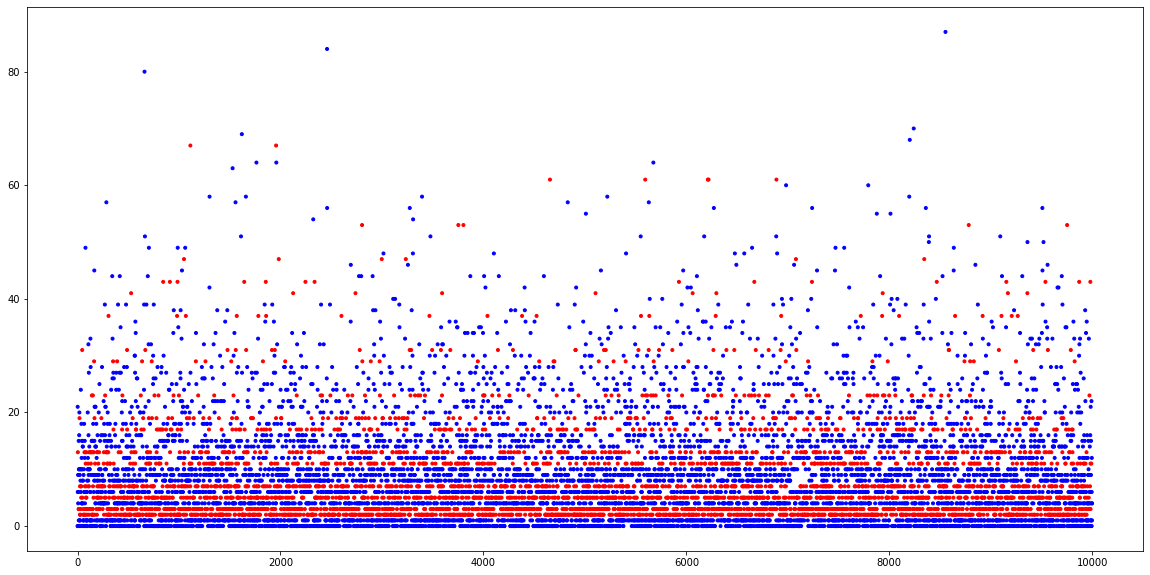

In [10]:
I = 395

m = df.iloc[I]["matrix"]
d = df.iloc[I]["direction"]
s = df.iloc[I]["switch"]

temp_pi = matrix(pi, m)
pi_syn, rotations = syn(temp_pi, direction=d, switch=s)
primes = get_primes(m)
cs = []
for r in rotations:
    if r in primes:
        cs.append("r")
    else:
        cs.append("b")

plt.figure(figsize=(20, 10))
plt.scatter([i for i in range(len(rotations))], rotations, c=cs, marker=".")